# Backward feature analysis in K-NN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('MHR.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

def backward_feature_elimination(X, y, k=1, print_interval=1):
    # Initialize variables
    num_features = X.shape[1]
    features = list(range(num_features))
    best_score = 0
    best_features = features.copy()
    iteration_count = 0

    while len(features) > 1:  # Ensure at least one feature remains
        scores = []
        for feature in features:
            # Temporarily remove the feature
            temp_features = [f for f in features if f != feature]
            X_temp = X[:, temp_features]

            # Perform k-NN with cross-validation
            try:
                knn = KNeighborsClassifier(n_neighbors=k)
                score = cross_val_score(knn, X_temp, y, cv=5, scoring='accuracy').mean()
                scores.append((score, feature))
            except ValueError as e:
                print(f"Error: {e}")
                continue

        # Find the feature whose removal results in the highest score
        if scores:
            scores.sort(reverse=True)
            best_score, worst_feature = scores[0]
            features.remove(worst_feature)

            # Keep track of the best feature set
            if best_score >= max(scores)[0]:
                best_features = features.copy()

                if iteration_count % print_interval == 0:
                    removed_reason = f"Removed feature after {num_features - iteration_count} features: {worst_feature} (Score: {best_score:.2f})"
                    print(removed_reason)
        else:
            break

        iteration_count += 1

    return best_features, best_score

# Set the print interval for feature removal
print_interval = 1  # Change this to the desired interval (e.g., 6, 5, 4, etc.)

# Perform backward feature elimination
best_features, best_score = backward_feature_elimination(X, y, print_interval=print_interval)

print(f"Best features: {best_features}")
print(f"Best cross-validation score: {best_score:.2f}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-NN model with the best features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:, best_features], y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test[:, best_features])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best features: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Removed feature after 6 features: 4 (Score: 0.84)
Removed feature after 5 features: 1 (Score: 0.83)
Removed feature after 4 features: 5 (Score: 0.81)
Removed feature after 3 features: 2 (Score: 0.70)
Removed feature after 2 features: 3 (Score: 0.49)
Best features: [0]
Best cross-validation score: 0.49
Accuracy with best features: 0.49
              precision    recall  f1-score   support

   high risk       0.49      0.64      0.56        47
    low risk       0.49      0.49      0.49        80
    mid risk       0.48      0.39      0.43        76

    accuracy                           0.49       203
   macro avg       0.49      0.51      0.49       203
weighted avg       0.49      0.49      0.48       203



Based on the results we obtained after performing backward feature elimination and evaluating the k-NN model with the best features, it seems that the model's performance decreased as features were removed. The final accuracy with the best features is 0.49, which indicates that the model is not performing well.

In such a scenario, where the model's performance significantly drops after feature selection, it may not be appropriate to use the k-NN model with the selected features.

If we're specifically interested in using the k-NN algorithm, we could experiment with different hyperparameters (such as the number of neighbors k) or consider using feature engineering techniques to create more informative features that could improve the model's accuracy. Additionally, we could also explore more advanced feature selection methods like forward selection or recursive feature elimination to find a better subset of features for the k-NN model.

## Trying out different k values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('MHR.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




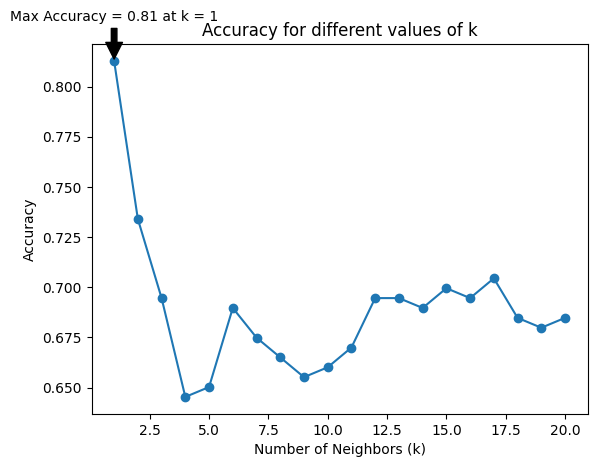

In [ ]:
import matplotlib.pyplot as plt
# Try different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Find the k value with the maximum accuracy
max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]

# Plot the accuracy for different values of k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of k')

# Annotate the plot with the maximum accuracy
plt.annotate(f'Max Accuracy = {max_accuracy:.2f} at k = {best_k}',
             xy=(best_k, max_accuracy),
             xytext=(best_k, max_accuracy + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('MHR.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the k-NN classifier
k = 1  # You can choose any number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

   high risk       0.86      0.91      0.89        47
    low risk       0.80      0.76      0.78        80
    mid risk       0.79      0.80      0.80        76

    accuracy                           0.81       203
   macro avg       0.82      0.83      0.82       203
weighted avg       0.81      0.81      0.81       203



With \( k=1 \), the k-nearest neighbors (k-NN) model achieved an accuracy of 0.81 (81%), a significant improvement over previous attempts. The precision, recall, and F1-scores are high across all risk levels, particularly for "high risk" with an F1-score of 0.89. Both "low risk" and "mid risk" classes also perform well, with F1-scores of 0.78 and 0.80, respectively. The macro and weighted averages for precision, recall, and F1-score are consistently around 0.81 to 0.83, indicating balanced performance. This result suggests that using \( k=1 \) effectively captures the nearest neighbor's class, leading to better predictions for this dataset.